In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('oni_index_noaa.txt',delim_whitespace=True, header = None, index_col=0)
df.index.name=""

In [4]:
df = df.rename(columns={1:'DJF', 2:'JFM', 3:'FMA', 4:'MAM', 5:'AMJ',6:'MJJ', 7:'JJA', 8:'JAS',
                   9:'ASO', 10:'SON',11:'OND', 12:'NDJ'})
df_sel = df[56:-1]

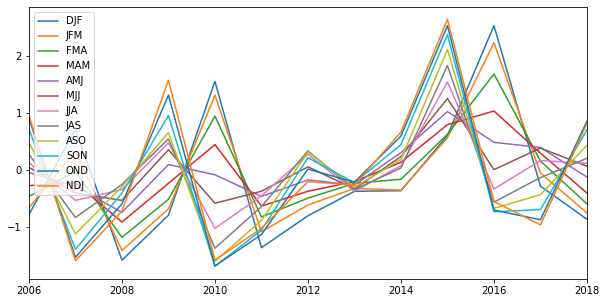

In [5]:
df_sel.plot(figsize=(10,5))


Text(0, 0.5, 'ONI')

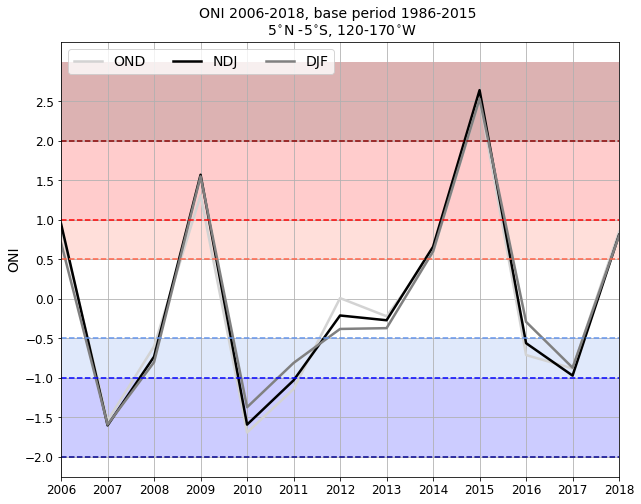

In [6]:
t = df_sel['NDJ'] 
t1 = np.array(df[57:]['DJF'])
yr = np.linspace(2006, 2018, 13)
deg = '$^{\circ}$'

df_sel['OND'].plot(color = 'lightgray', lw = 2.5, label='OND')
t.plot(color = 'k', lw = 2.5, figsize=(10,8), label = 'NDJ')
plt.plot(yr, t1, color = 'gray', lw = 2.5, label='DJF')


plt.plot(yr, np.full_like(yr, 0.5), '--', color = 'tomato')
plt.plot(yr, np.full_like(yr, -0.5), '--', color = 'cornflowerblue')
plt.plot(yr, np.full_like(yr, 1), '--', color = 'red')
plt.plot(yr, np.full_like(yr, 2), '--', color = 'darkred')
plt.plot(yr, np.full_like(yr, -1), 'b--')
plt.plot(yr, np.full_like(yr, -2), '--', color ='darkblue')
plt.xticks(yr, fontsize=12)
plt.yticks(np.linspace(-2, 2.5, 10), fontsize=12)
plt.legend(loc='upper left', fontsize=14, ncol = 3)
plt.grid()
plt.axhspan(-1,-0.5 , facecolor='cornflowerblue', alpha=0.2)
plt.axhspan(-2, -1, facecolor='blue', alpha = 0.2)
plt.axhspan(0.5, 1, facecolor= 'tomato', alpha = 0.2)
plt.axhspan(1, 2, facecolor='red', alpha = 0.2)
plt.axhspan(2,3, facecolor='darkred', alpha = 0.3)
plt.title('ONI 2006-2018, base period 1986-2015 \n 5'+deg+'N -5'+deg+'S, 120-170'+deg+'W', fontsize=14)
plt.ylabel('ONI', fontsize = 14)

#plt.savefig('ONI_index_noaa.pdf')

In [58]:
path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/'

ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds2 = xr.open_dataset(path + 'erai.tp.monmean.nc')


In [56]:
era5_trop = ds.sel(lat=slice(-30,30))
erai_trop = ds.sel(lat=slice(30,-30), time=slice('2006-01-01', '2018-12-31'))

In [9]:
nina07 = era5_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10 = era5_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17 = era5_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09 = era5_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15 = era5_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau = era5_trop.sel(time=slice('2012-10-01', '2013-03-01'))

diff11 = nina07.ctpt[1,:,:] - neau.ctpt[1,:,:]
diff12 = nina07.ctpt[2,:,:] - neau.ctpt[2,:,:]
diff01 = nina07.ctpt[3,:,:] - neau.ctpt[3,:,:]



In [10]:
nina07.ctpt[1:4, :,:]
diff_LA_07 = nina07.ctpt[1:4,:,:] - neau.ctpt[1:4,:,:].values
LA_07 = diff_LA_07.mean(axis=0)

In [11]:
diff_LA_10 = nina10.ctpt[1:4,:,:] - neau.ctpt[1:4,:,:].values
LA_10 = diff_LA_10.mean(axis=0)

In [12]:
diff_LA_17 = nina17.ctpt[1:4,:,:] - neau.ctpt[1:4, :, :].values
LA_17 = diff_LA_17.mean(axis=0)

In [15]:
diff_EL_09 = nino09.ctpt[1:4,:, :] - neau.ctpt[1:4, :, :].values
EL_09 = diff_EL_09.mean(axis=0)

In [16]:
diff_EL_15 = nino15.ctpt[1:4, :, :] - neau.ctpt[1:4, :, :].values
EL_15 = diff_EL_15.mean(axis=0)

/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/enso/plot_func.py:111: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


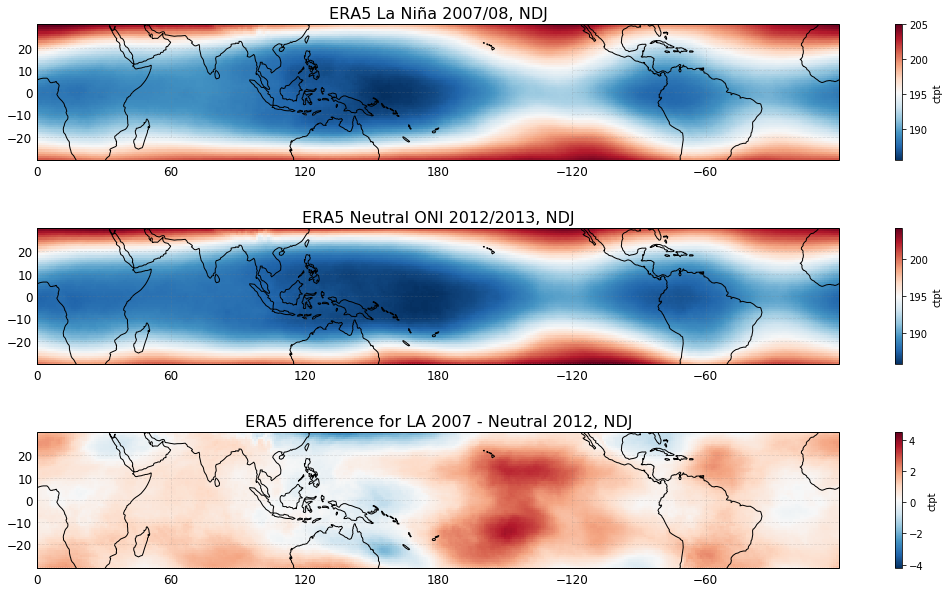

In [17]:
ds1 = nina07.ctpt[1:4, :, :].mean(axis=0)
ds2 = neau.ctpt[1:4, :, :].mean(axis=0)
ds3 = LA_07
tl1 = 'ERA5 La Niña 2007/08, NDJ'
tl2 = 'ERA5 Neutral ONI 2012/2013, NDJ'
tl3 = 'ERA5 difference for LA 2007 - Neutral 2012, NDJ'
vmin1 = 183
vmax1 = 206
vmin2 = -4.2
vmax2= 4.5

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r', enso=True)
#r.savefig('la_nina_2007_neau_2012.pdf')

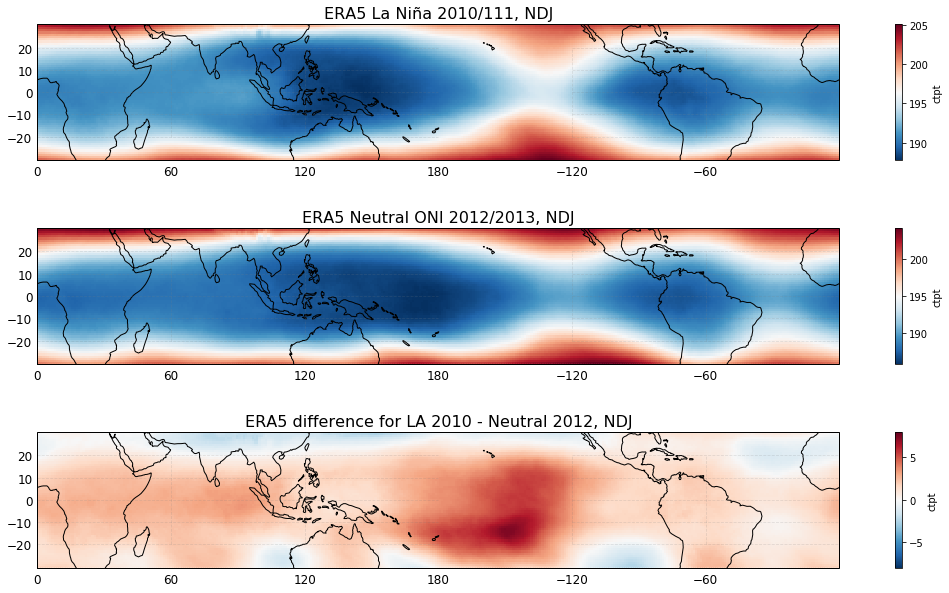

In [18]:
ds1 = nina10.ctpt[1:4, :, :].mean(axis=0)
ds2 = neau.ctpt[1:4, :, :].mean(axis=0)
ds3 = LA_10
tl1 = 'ERA5 La Niña 2010/111, NDJ'
tl2 = 'ERA5 Neutral ONI 2012/2013, NDJ'
tl3 = 'ERA5 difference for LA 2010 - Neutral 2012, NDJ'
vmin2 = -8
vmax2= 8

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r', enso=True)
#r.savefig('la_nina_2010_neau_2012.pdf')

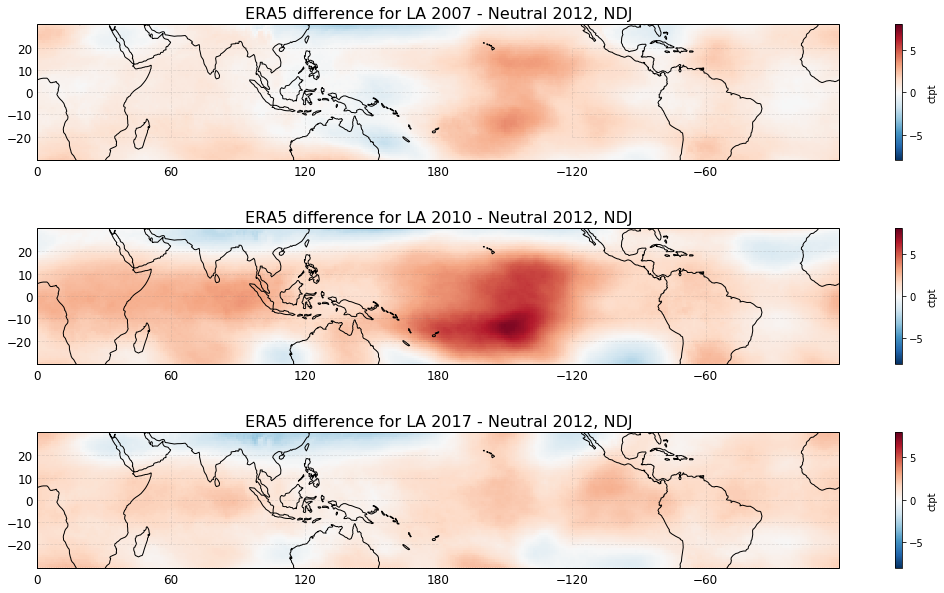

In [19]:
ds1 = LA_07
ds2 = LA_10
ds3 = LA_17
tl1 = 'ERA5 difference for LA 2007 - Neutral 2012, NDJ'
tl2 = 'ERA5 difference for LA 2010 - Neutral 2012, NDJ'
tl3 = 'ERA5 difference for LA 2017 - Neutral 2012, NDJ'
vmin2 = -8
vmax2= 8

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r')
#r.savefig('la_nina_diff_2007-2010-2017.pdf')

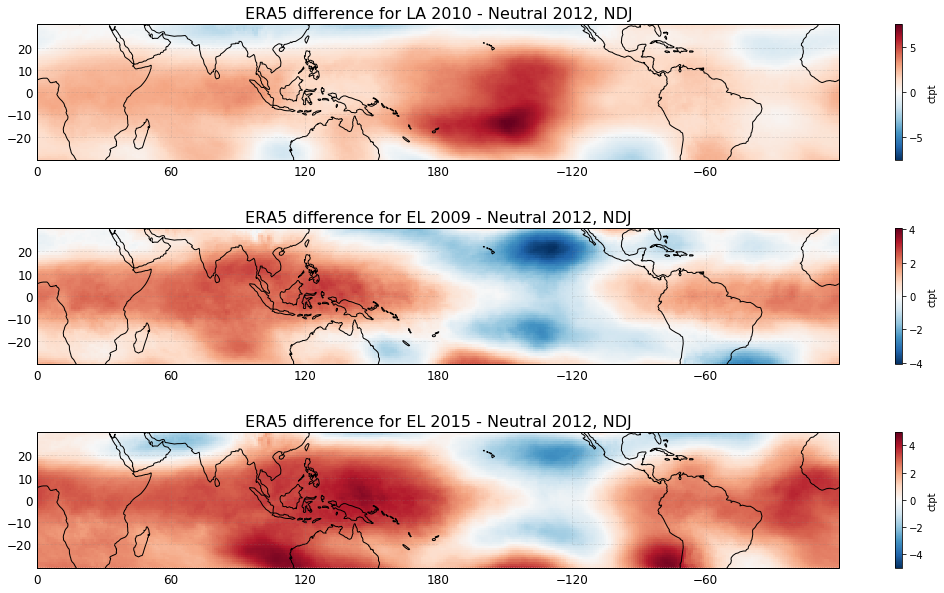

In [20]:
ds1 = LA_10
ds2 = EL_09
ds3 = EL_15
tl1 = 'ERA5 difference for LA 2010 - Neutral 2012, NDJ'
tl2 = 'ERA5 difference for EL 2009 - Neutral 2012, NDJ'
tl3 = 'ERA5 difference for EL 2015 - Neutral 2012, NDJ'
vmin2 = -5
vmax2= 5

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r', enso=True)
#r.savefig('el_nino_comparison_la_nina_2009-2015.pdf')

### Difference ERA5 - GPS-RO, 5x5 grid data 

#### ERA-I is included for analysis later

In [13]:
path_regrid = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'

era5_regrid = xr.open_dataset(path_regrid+ 'gridfile_test.nc')
erai_regrid = xr.open_dataset(path_regrid + 'erai_regrid_5x5.nc')
gpsro = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')
gpsro_mm = gpsro.resample(time='M').mean()

In [14]:
nina07 = era5_regrid.sel(time=slice('2007-10-01', '2008-03-01'))
nina10 = era5_regrid.sel(time=slice('2010-10-01', '2011-03-01'))
nina17 = era5_regrid.sel(time=slice('2017-10-01', '2018-03-01'))

nino09 = era5_regrid.sel(time=slice('2009-10-01', '2010-03-01'))
nino14 = era5_regrid.sel(time=slice('2014-10-01', '2015-03-01'))
nino15 = era5_regrid.sel(time=slice('2015-10-01', '2016-03-01'))

neau = era5_regrid.sel(time=slice('2012-10-01', '2013-03-01'))

nina07_gps = gpsro_mm.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_gps = gpsro_mm.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_gps = gpsro_mm.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_gps = gpsro_mm.sel(time=slice('2009-10-01', '2010-03-01'))
nino14_gps = gpsro_mm.sel(time=slice('2014-10-01', '2015-03-01'))
nino15_gps = gpsro_mm.sel(time=slice('2015-10-01', '2016-03-01'))

neau_gps = gpsro_mm.sel(time=slice('2012-10-01', '2013-03-01'))


In [15]:
diff_LA_10 = nina10.ctpt[1:4,:,:] - nina10_gps.CP_T[1:4,:,:].values
diff_LA_07 = nina07.ctpt[1:4,:,:] - nina07_gps.CP_T[1:4,:,:].values
diff_LA_17 = nina17.ctpt[1:4,:,:] - nina17_gps.CP_T[1:4,:,:].values

diff_LA_10_lrt = nina10.tpt[1:4,:,:] - nina10_gps.LR_T[1:4,:,:].values
diff_LA_07_lrt = nina07.tpt[1:4,:,:] - nina07_gps.LR_T[1:4,:,:].values
diff_LA_17_lrt = nina17.tpt[1:4,:,:] - nina17_gps.LR_T[1:4,:,:].values

In [16]:
diff_EL_09 = nino09.ctpt[1:4, : ,:] - nino09_gps.CP_T[1:4,:,:].values
diff_EL_14 = nino14.ctpt[1:4,:,:] - nino14_gps.CP_T[1:4,:,:].values
diff_EL_15 = nino15.ctpt[1:4,:,:] - nino15_gps.CP_T[1:4,:,:].values

In [17]:
gps_LA_07 = nina07_gps.CP_T[1:4, :, :] - neau_gps.CP_T[1:4, : ,:].values
gps_LA_10 = nina10_gps.CP_T[1:4, :, :] - neau_gps.CP_T[1:4, : ,:].values
gps_LA_17 = nina17_gps.CP_T[1:4, :, :] - neau_gps.CP_T[1:4, : ,:].values


/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/enso/plot_func.py:111: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


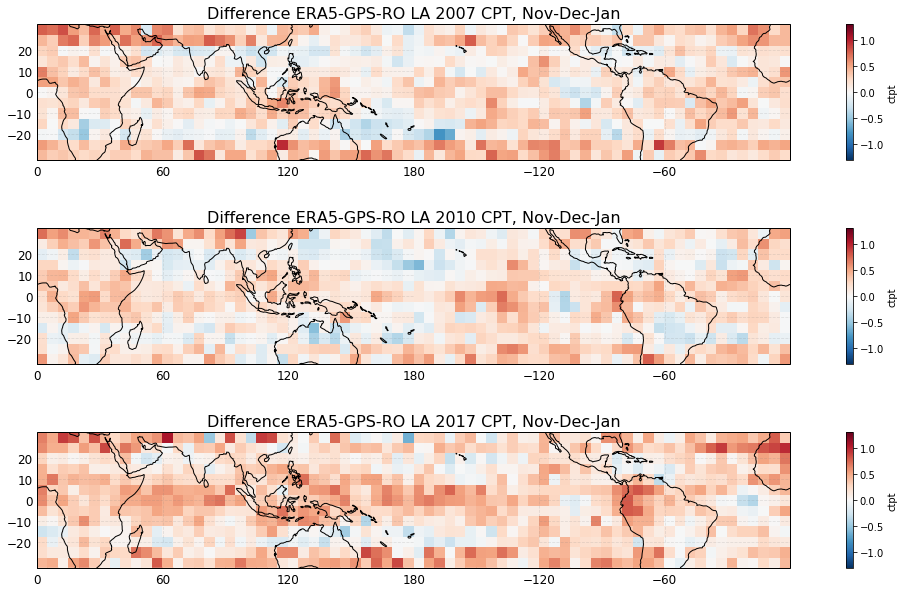

In [18]:
ds1 = diff_LA_07.mean(axis=0)
ds2 = diff_LA_10.mean(axis=0)
ds3 = diff_LA_17.mean(axis=0)
tl1 = 'Difference ERA5-GPS-RO LA 2007 CPT, Nov-Dec-Jan'
tl2 = 'Difference ERA5-GPS-RO LA 2010 CPT, Nov-Dec-Jan'
tl3 = 'Difference ERA5-GPS-RO LA 2017 CPT, Nov-Dec-Jan'
vmin2 = -1.3
vmax2= 1.3

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r')

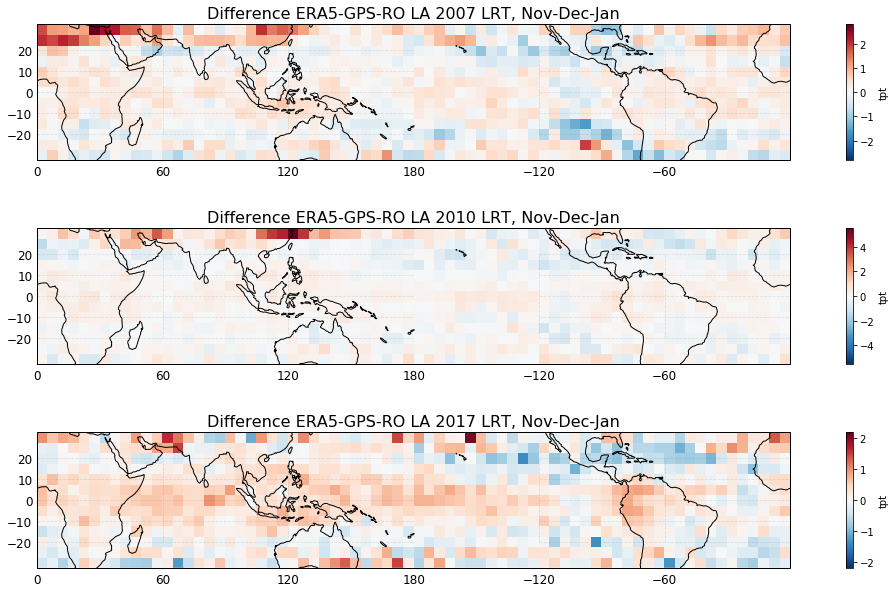

In [19]:
ds1 = diff_LA_07_lrt.mean(axis=0)
ds2 = diff_LA_10_lrt.mean(axis=0)
ds3 = diff_LA_17_lrt.mean(axis=0)
tl1 = 'Difference ERA5-GPS-RO LA 2007 LRT, Nov-Dec-Jan'
tl2 = 'Difference ERA5-GPS-RO LA 2010 LRT, Nov-Dec-Jan'
tl3 = 'Difference ERA5-GPS-RO LA 2017 LRT, Nov-Dec-Jan'
vmin2 = -2.2
vmax2= 2.2

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r', enso=True)

ds1 = gps_LA_07.mean(axis=0)
ds2 = gps_LA_10.mean(axis=0)
ds3 = gps_LA_17.mean(axis=0)
tl1 = 'GPS-RO LA 2007 CPT - GPS-RO neautral 2012, CPT, \nNov-Dec-Jan'
tl2 = 'GPS-RO LA 2010 CPT - GPS-RO neautral 2012, CPT, \nNov-Dec-Jan'
tl3 = 'GPS-RO LA 2017 CPT - GPS-RO neautral 2012, CPT, \nNov-Dec-Jan'
vmin2 = -8
vmax2= 8

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r')

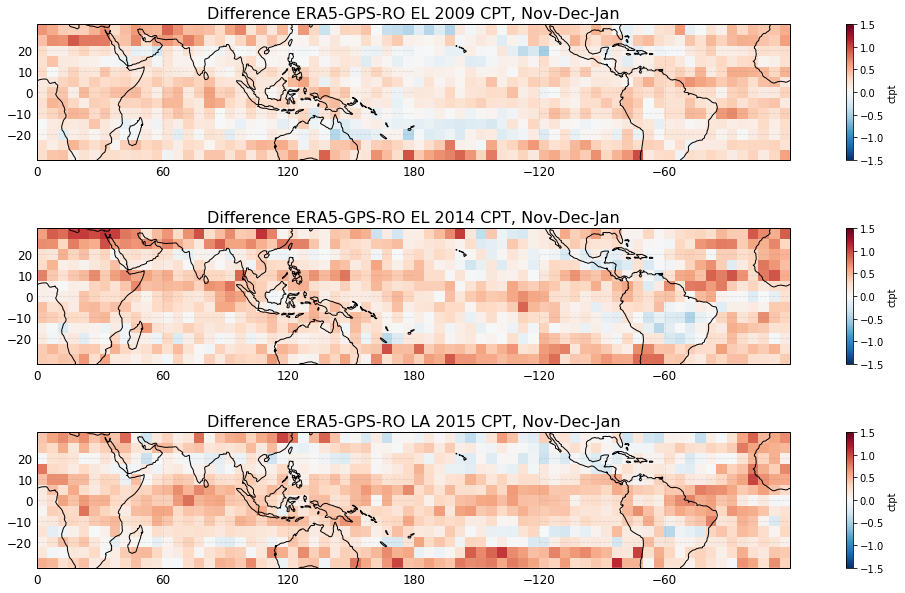

In [26]:
ds1 = diff_EL_09.mean(axis=0)
ds2 = diff_EL_14.mean(axis=0)
ds3 = diff_EL_15.mean(axis=0)
tl1 = 'Difference ERA5-GPS-RO EL 2009 CPT, Nov-Dec-Jan'
tl2 = 'Difference ERA5-GPS-RO EL 2014 CPT, Nov-Dec-Jan'
tl3 = 'Difference ERA5-GPS-RO LA 2015 CPT, Nov-Dec-Jan'
vmin2 = -1.5
vmax2= 1.5

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, cm='RdBu_r')

## Plot max and min value of ONI, hhv SON 2015 = 2.37, SON 2010 = -1.70
### ERA-I included for comparison

In [20]:
nina07_erai = erai_regrid.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_erai = erai_regrid.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_erai = erai_regrid.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_erai = erai_regrid.sel(time=slice('2009-10-01', '2010-03-01'))
nino14_erai = erai_regrid.sel(time=slice('2014-10-01', '2015-03-01'))
nino15_erai = erai_regrid.sel(time=slice('2015-10-01', '2016-03-01'))


In [27]:
diff_max_el = nino15.ctpt[0,:,:] - nino15_gps.CP_T[0,:,:].values
diff_max_la = nina10.ctpt[0,:,:] - nina10_gps.CP_T[0,:,:].values

diff_lrt_max_el = nino15.tpt[0,:,:] - nino15_gps.LR_T[0,:,:].values
diff_lrt_max_la = nina10.tpt[0,:,:] - nina10_gps.LR_T[0,:,:].values

diff_max_el_erai = nino15_erai.ctpt[0,:,:] - nino15_gps.CP_T[0,:,:].values
diff_max_la_erai = nina10_erai.ctpt[0,:,:] - nina10_gps.CP_T[0,:,:].values

diff_lrt_el_erai = nino15_erai.tpt[0,:,:] - nino15_gps.LR_T[0,:,:].values
diff_lrt_la_erai = nina10_erai.tpt[0,:,:] - nina10_gps.LR_T[0,:,:].values

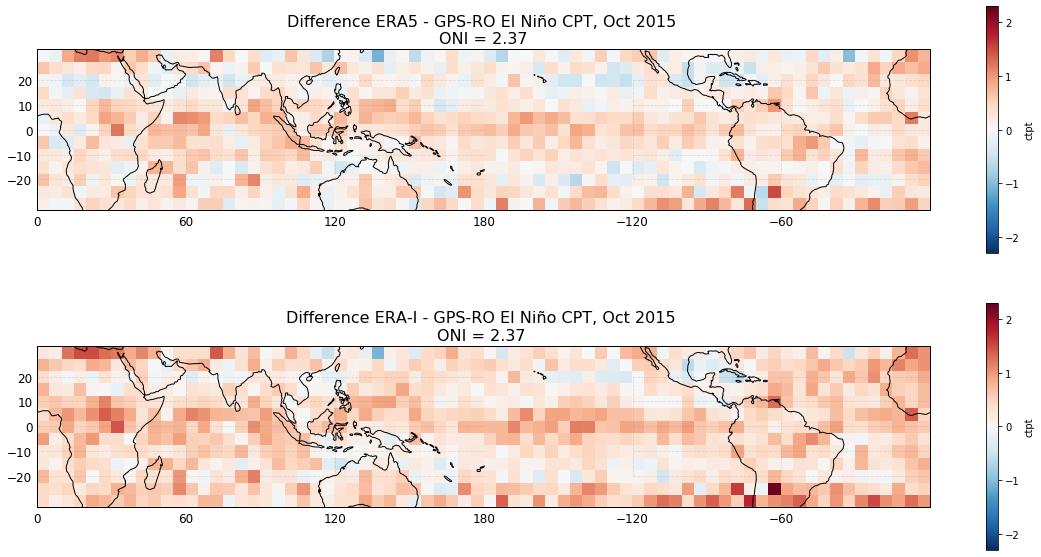

In [32]:
ds1 = diff_max_el
ds2 = diff_max_el_erai
tl1 = 'Difference ERA5 - GPS-RO El Niño CPT, Oct 2015 \nONI = 2.37'
tl2 = 'Difference ERA-I - GPS-RO El Niño CPT, Oct 2015 \nONI = 2.37 '
vmin=-2.3
vmax = 2.3

ff = f.enso_maxmin(ds1, tl1, ds2, tl2, vmin,vmax)

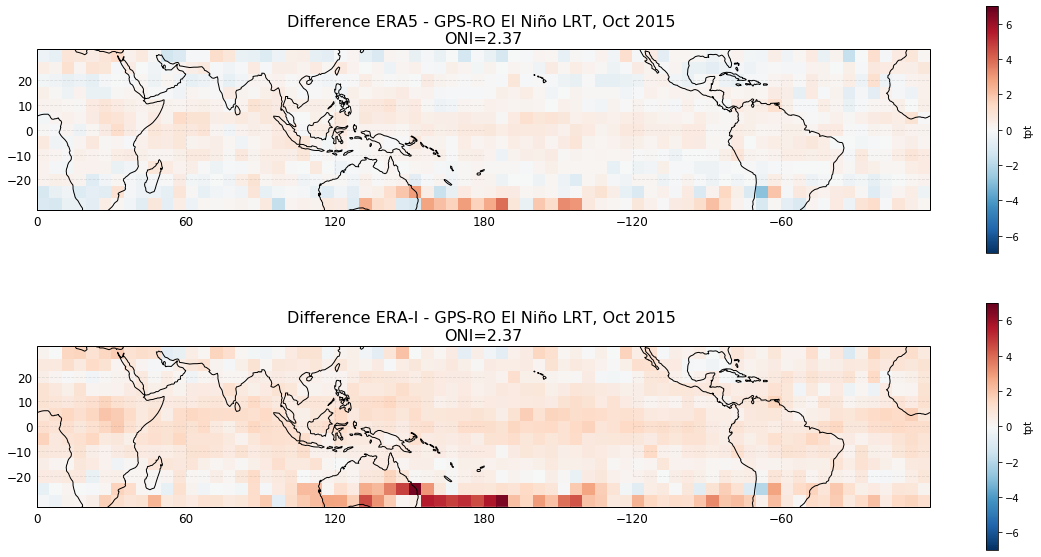

In [40]:
lrt_el = f.enso_maxmin(ds1=diff_lrt_max_el, tl1 = 'Difference ERA5 - GPS-RO El Niño LRT, Oct 2015 \nONI=2.37',
                       ds2=diff_lrt_el_erai, tl2 = 'Difference ERA-I - GPS-RO El Niño LRT, Oct 2015 \nONI=2.37',
                       vmin=-7, vmax=7)

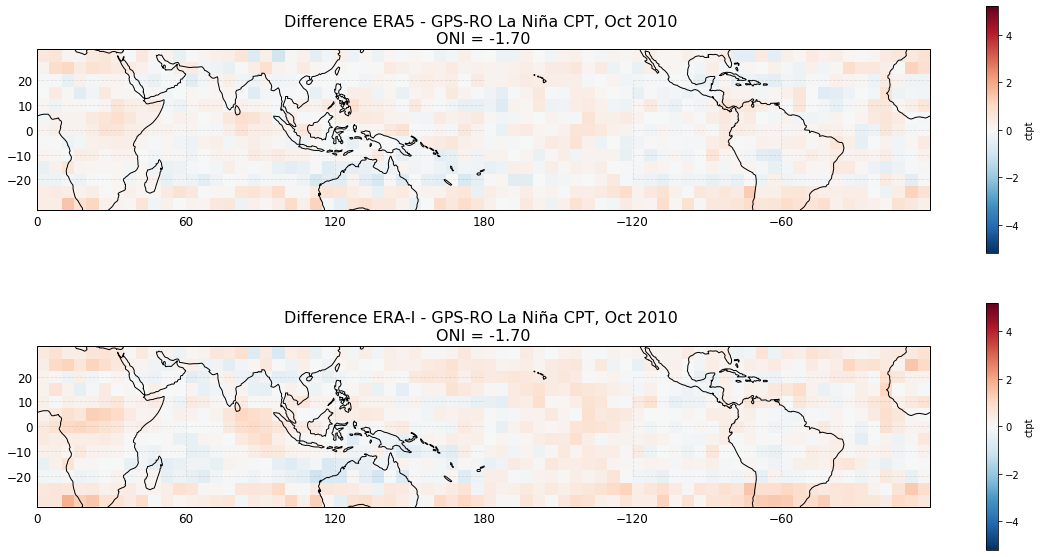

In [52]:
ds1 = diff_max_la
ds2 = diff_max_la_erai
tl1 = 'Difference ERA5 - GPS-RO La Niña CPT, Oct 2010 \nONI = -1.70'
tl2 = 'Difference ERA-I - GPS-RO La Niña CPT, Oct 2010 \nONI = -1.70'
vmin=-5.2
vmax = 5.2

ff = f.enso_maxmin(ds1, tl1, ds2, tl2, vmin,vmax)

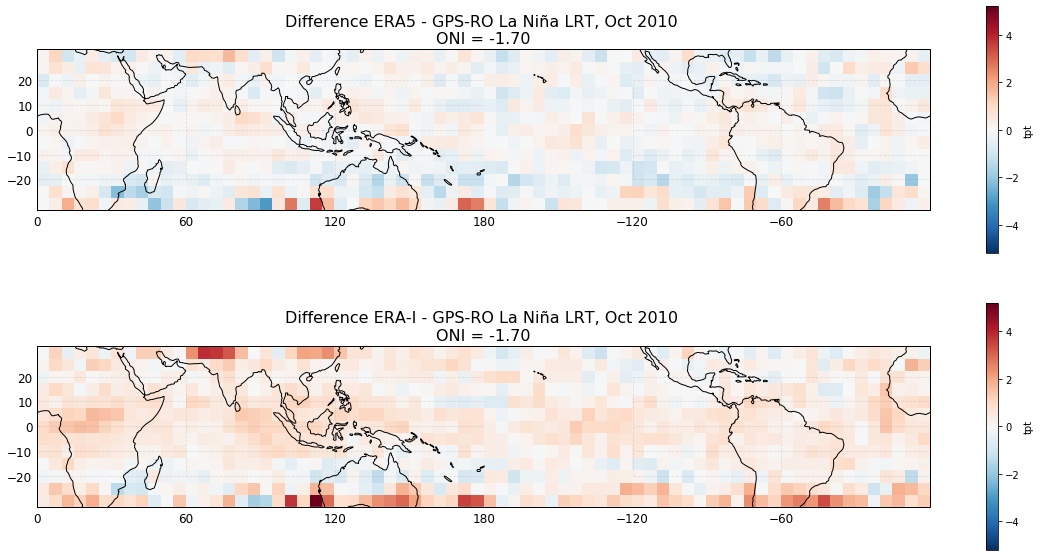

In [53]:
lrt_la = f.enso_maxmin(ds1=diff_lrt_max_la, tl1='Difference ERA5 - GPS-RO La Niña LRT, Oct 2010 \nONI = -1.70',
                      ds2=diff_lrt_la_erai, tl2='Difference ERA-I - GPS-RO La Niña LRT, Oct 2010 \nONI = -1.70',
                      vmin=-5.2, vmax=5.2)